# Copyright:
The code has been borrowed from 

https://colab.research.google.com/github/orico/PCAvsAutoencoder/blob/master/PCA_vs_Autoencoder_tutorial.ipynb

For personal study purposes only.


We take a 4D feature from iris, transformed them into 2D using either PCA or AutoEncoder. 

Then we check separation, which is better?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets.mnist import load_data
from sklearn.preprocessing import MinMaxScaler

In [17]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train.reshape(60_000, 784) / 256
x_test = x_test.reshape(10_000, 784) / 256

## PCA

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)


## AutoEncoder

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
m = Sequential()
m.add(Dense(units=512, activation='relu', input_shape=(784, )))
m.add(Dense(units=128, activation='relu'))
m.add(Dense(units=2, activation='linear', name='bottleneck'))
m.add(Dense(units=1228, activation='relu'))
m.add(Dense(units=512, activation='relu'))
m.add(Dense(units=784, activation='sigmoid'))

m.compile(loss='mse', optimizer='adam')

In [21]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 2)                 258       
                                                                 
 dense_2 (Dense)             (None, 1228)              3684      
                                                                 
 dense_3 (Dense)             (None, 512)               629248    
                                                                 
 dense_4 (Dense)             (None, 784)               402192    
                                                                 
Total params: 1502966 (5.73 MB)
Trainable params: 150296

In [22]:
m.fit(
    x=x_train,
    y=x_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test, x_test),
)

Epoch 1/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0564 - val_loss: 0.0455
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0434 - val_loss: 0.0416
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0407 - val_loss: 0.0400
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0395 - val_loss: 0.0393
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0385 - val_loss: 0.0384


In [27]:
x_autoencoder = m.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [33]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [36]:
import matplotlib.cm as cm

def plot_transformed(x_transformed, ax, title):
    colors = cm.rainbow(np.linspace(0, 1, 10))
    for i, target_name, color in zip(range(10), range(10), colors):
        ax.scatter(
            x_transformed[y_train==i, 0], 
            x_transformed[y_train==i, 1],
            color=color,
            alpha=1,
            s=0.3,
            label=target_name,
        )
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_title(title)
    return

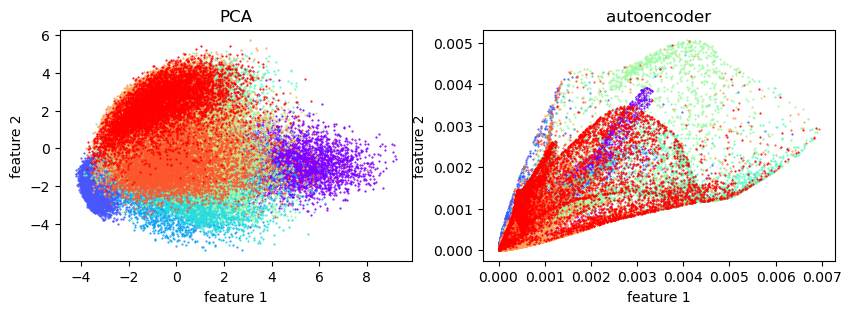

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
plot_transformed(x_pca, ax[0], 'PCA')
plot_transformed(x_autoencoder, ax[1], 'autoencoder')


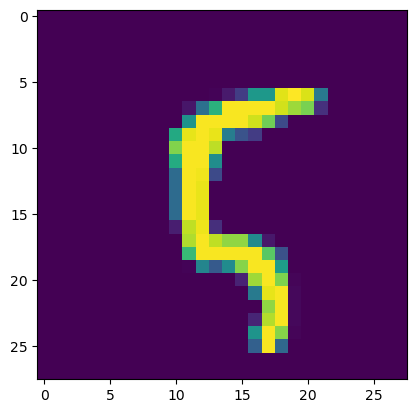

1/1 [==============================] - 0s 20ms/step


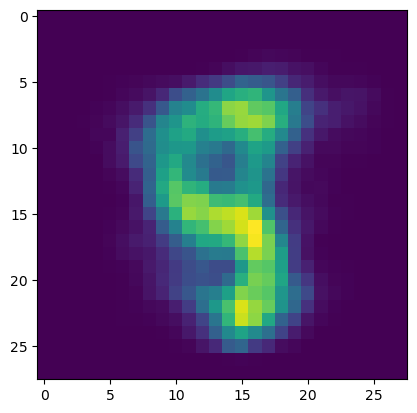

In [61]:
n = 100
plt.imshow(x_train[n].reshape(28, 28))
plt.show()
plt.imshow(m.predict(x_train[[n]]).reshape(28, 28))
plt.show()